 ╔══<i><b>Alai-DeepLearning</b></i>════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 2. Numpy Basis**
# Homework 1. 두 Feature의 범위가 상이했을 때의, KNN

### _Objective_
1. 스스로 처음부터 끝까지 KNN 알고리즘을 구현하는 데에 집중합니다. <br>
2. Feature들을 Normalization하는 방법을 배워봅니다. <br>

╚═════════════════════════════════════╝

In [0]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

## 예제 데이터 )  로맨스 영화 분석

로맨스 영화에는 밝은 분위기의 **로맨스 코미디**와 진지한 분위기의 **로맨스 드라마**가 있습니다. 우리는 로맨스 영화를 자동으로 분류하는 분류기를 만들고자 하는데, 이 때 선정한 Feature로는 **배우가 웃는 횟수**와 **배우가 우는 횟수**가 있습니다. 우리는 이 두 Feature를 통해 자동으로 분류하는 문제를 만들고자 합니다. 


#### 데이터 ) 각 영화 별 웃는 횟수와 우는 횟수

| 영화 제목 | the number of smile | The number of cry | Type |
| ------  | ----| ----| --- |
| A | 120 | 3 | comedy |
| B | 105 | 2 | comedy |
| C | 25 | 12 | drama |
| D | 32 | 15 | drama |
| E | 17 | 9  | drama |
| F | 98 | 5  | comedy |
| G | 130 | 1 | comedy |
| H | 0  | 16 | drama  |
| I | 40 | 20 | drama |

In [0]:
dataset = np.array([
    [120, 3],
    [105, 2],
    [25, 12],
    [32, 15],
    [17, 9],
    [98, 5],
    [130, 1],
    [0, 16],
    [40, 20],
    [100, 10]
])

labels = np.array(["comedy", "comedy", "drama",
                   "drama","drama","comedy","comedy",
                   "drama","drama","comedy"])

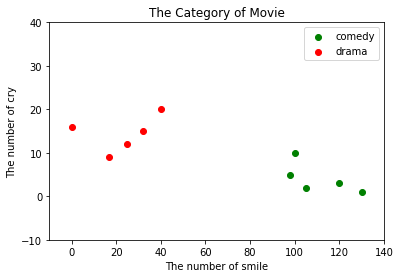

In [3]:
plt.title("The Category of Movie")
plt.scatter(dataset[labels=="comedy",0],dataset[labels=="comedy",1],
            label='comedy', c='g')
plt.scatter(dataset[labels=="drama",0],dataset[labels=="drama",1],
            label='drama', c='r')

plt.xlim(-10,140)
plt.ylim(-10,40)

plt.xlabel('The number of smile')
plt.ylabel('The number of cry')
plt.legend()
plt.show()

# \[ 문제 \]

아래는 수업 중에 작성하였던 코드입니다. 

In [0]:
def classify_knn(inX, dataset, labels, K):
    # (1) 우리가 분류항목을 알고자 하는 점 (inX)와 
    # 알고 있는 점들(dataset)과의 모든 점 거리를 계산
    dists = np.sqrt(np.sum((inX-dataset)**2, axis=1))
    
    # (2) 오름 차순으로 거리의 길이를 정렬
    sorted_index = dists.argsort()
    
    # (3) inX와의 거리가 가장짧은 K개의 아이템 추출
    sorted_labels = labels[sorted_index]
    K_nearest_labels = sorted_labels[:K]
    
    # (4) K개의 아이템에서 가장 많은 분류 항목 찾기
    _labels, count_labels = np.unique(K_nearest_labels,
          return_counts=True)
    
    # (5) 해당 항목 반환
    return _labels[count_labels.argmax()]

우리는 배우의 웃는 횟수가 60번이고, 우는 횟수가 0번이었던 영화의 카테고리를 예측해보고자 합니다. 

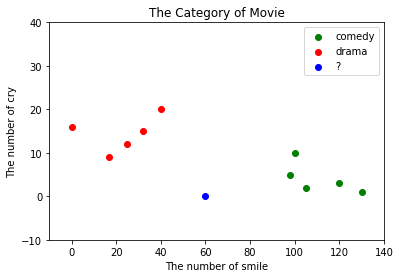

In [5]:
inX = np.array([60,0])

plt.title("The Category of Movie")
plt.scatter(dataset[labels=="comedy",0],dataset[labels=="comedy",1],
            label='comedy', c='g')
plt.scatter(dataset[labels=="drama",0],dataset[labels=="drama",1],
            label='drama', c='r')
plt.scatter(inX[0],inX[1],label="?",
            c='b')



plt.xlim(-10,140)
plt.ylim(-10,40)

plt.xlabel('The number of smile')
plt.ylabel('The number of cry')
plt.legend()
plt.show()

In [6]:
classify_knn(inX,dataset,labels,4)

'drama'

우는 횟수가 단 한번도 발생하지 않았지만, 이를 drama로 판단하는 잘못된 결과를 반환하였습니다. 

로맨스 영화의 특징 상, 배우가 웃는 횟수가 배우가 우는 횟수보다 훨씬 많이 일어납니다. 그래서 웃는 횟수의 값의 범위와 우는 횟수의 값의 범위가 매우 상이합니다. 각 Feature의 범위가 매우 다르기 때문입니다. 

이러한 문제를 해결하기 위해서는 어떤 식으로 KNN을 수정해야 할까요?

-----

In [0]:
def classify_knn(inX, dataset, labels, K):
    # dataset과 inX를 표준화한다.
    d0_mean = dataset[:,0].mean()
    d0_std = dataset[:,0].std()
    d1_mean = dataset[:,1].mean()
    d1_std = dataset[:,1].std()

    s_dataset = np.stack([(dataset[:,0] - d0_mean) / d0_std,
                          (dataset[:,1] - d1_mean) / d1_std], axis=1)
    
    s_inX = [(inX[0] - d0_mean) / d0_std, (inX[1] - d1_mean)/d1_std]

    # (1) 표준화한 dataset과 inX의 거리를 계산한다.
    dists = np.sqrt(np.sum((s_inX - s_dataset)**2, axis=1))
    
    # (2) 오름 차순으로 거리의 길이를 정렬
    sorted_index = dists.argsort()
    
    # (3) inX와의 거리가 가장짧은 K개의 아이템 추출
    sorted_labels = labels[sorted_index]
    K_nearest_labels = sorted_labels[:K]
    
    # (4) K개의 아이템에서 가장 많은 분류 항목 찾기
    _labels, count_labels = np.unique(K_nearest_labels, return_counts=True)
    
    # (5) 해당 항목 반환
    return _labels[count_labels.argmax()]

In [11]:
inX = [60, 0]
classify_knn(inX,dataset,labels,4)
# 아래와 같은 결과가 나와야 합니다.
# >>> COMEDY

'comedy'

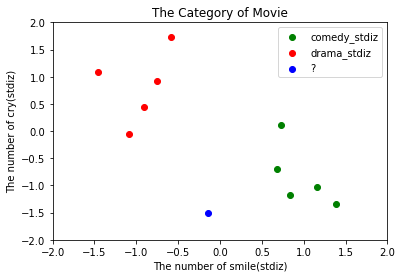

In [12]:
## 표준화한 scatter 다이어그램을 찍어본다.
d0_mean = dataset[:,0].mean()
d0_std = dataset[:,0].std()
d1_mean = dataset[:,1].mean()
d1_std = dataset[:,1].std()

s_dataset = np.stack([(dataset[:,0] - d0_mean) / d0_std,
          (dataset[:,1] - d1_mean) / d1_std], axis=1)

inX = [60, 0]

s_inX = [(inX[0] - d0_mean) / d0_std, (inX[1] - d1_mean)/d1_std]
s_inX

plt.title("The Category of Movie")
plt.scatter(s_dataset[labels=="comedy",0], s_dataset[labels=="comedy",1], label='comedy_stdiz', c='g')
plt.scatter(s_dataset[labels=="drama",0], s_dataset[labels=="drama",1], label='drama_stdiz', c='r')
plt.scatter(s_inX[0], s_inX[1],label="?", c='b')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('The number of smile(stdiz)')
plt.ylabel('The number of cry(stdiz)')
plt.legend()
plt.show()
